In [17]:
import numpy as np 
from matplotlib import pyplot as plt
import sympy as sy
sy.init_printing()

In [18]:
def translate_matrix(A,a,b):
    return np.matmul(np.array([
    [1, 0, a],
    [0, 1, b],
    [0, 0, 1]
]), A)

def rotate_matrix(A, theta, a=0, b=0):
    translation = np.array([
        [1, 0, a],
        [0, 1, b],
        [0, 0, 1]
    ])
    translation_neg = np.array([
        [1, 0, -a],
        [0, 1, -b],
        [0, 0, 1]
    ])
    rotation = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    return np.matmul(np.matmul(np.matmul(translation, rotation), translation_neg),A)

def reflect_matrix(A, a, b, c):
    if not a and not b: 
        print("bad input. a and b cannot both be 0")
        return A
    return (1/(a**2+b**2))*translate_matrix(np.matmul(np.array([
        [b**2 - a**2, -2*a*b, 0],
        [-2*a*b, a**2 - b**2, 0],
        [0, 0, 1]
    ]),A), -2*c*a, -2*c*b)

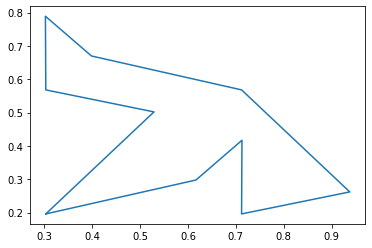

In [19]:
model_tile = np.array([
    [0.3036,0.6168,0.7128,0.7120,0.9377,0.7120,0.3989,0.3028,0.3036,0.5293,0.3036],
    [0.1960,0.2977,0.4169,0.1960,0.2620,0.5680,0.6697,0.7889,0.5680,0.5020,0.1960],
    [1]*11
])

plt.plot(model_tile[0], model_tile[1])
pass

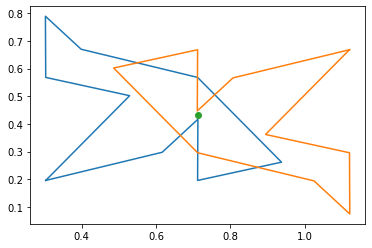

In [20]:
# rotate model about a point matrix: (0:7120; 0:4320
first_tile = rotate_matrix(model_tile,np.pi,0.7120, 0.432)

plt.plot(model_tile[0], model_tile[1])
plt.plot(first_tile[0], first_tile[1])
plt.plot([0.712],[0.432], marker="o")
pass

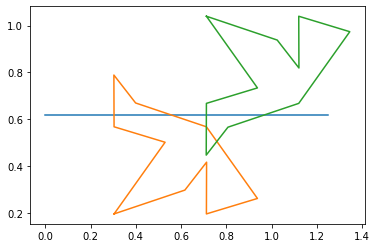

In [21]:
# Reflect about y = 0.618
# Then translate x by 0.4084
second_tile = translate_matrix(reflect_matrix(model_tile, 0, 1, -0.618), 0.4084, 0)

x = np.linspace(0,1.25,100)
ax = plt.axes()
ax.plot(x, [0.618]*100)
plt.plot(model_tile[0], model_tile[1])
plt.plot(second_tile[0], second_tile[1]) 
pass

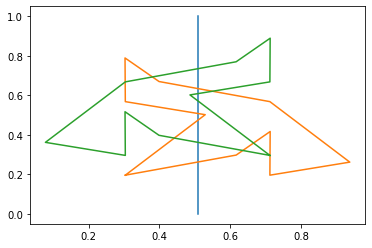

In [22]:
# Third tile: reflect over x = 0.5078 and translate by 0.1 over y-axis
third_tile = translate_matrix(reflect_matrix(model_tile, 1, 0, -0.5078), 0, 0.1)

y = np.linspace(0,1,100)
ax = plt.axes()
ax.plot([0.5078]*100, y)
plt.plot(model_tile[0], model_tile[1])
plt.plot(third_tile[0], third_tile[1])
pass

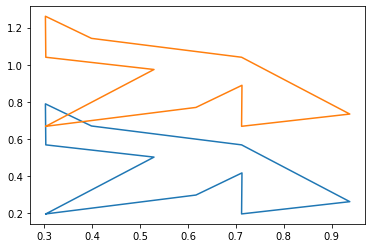

In [23]:
# Translate over y by 0.4720
fourth_tile = translate_matrix(model_tile, 0, 0.4720)

plt.plot(model_tile[0], model_tile[1])
plt.plot(fourth_tile[0],fourth_tile[1])
pass

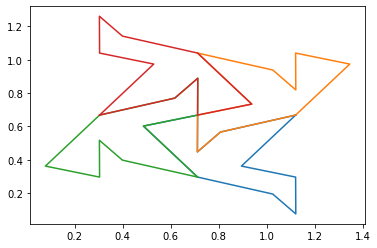

In [24]:
# plot all 4 base tiles
plt.plot(first_tile[0], first_tile[1])
plt.plot(second_tile[0], second_tile[1])
plt.plot(third_tile[0], third_tile[1])
plt.plot(fourth_tile[0], fourth_tile[1])
pass

In [25]:
def tesselate_general(shapes, n, m, xs, ys):
    for i in range(n):
        for j in range(m):
            for shape in shapes:
                t = translate_matrix(shape,i*xs,j*ys)
                plt.plot(t[0], t[1])

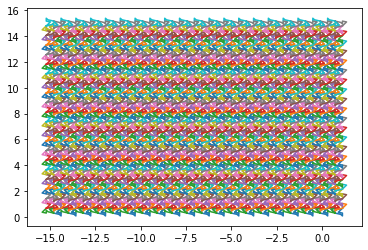

In [26]:
tesselate_general([first_tile, second_tile,third_tile,fourth_tile],20,20,-0.8168, 0.7441)

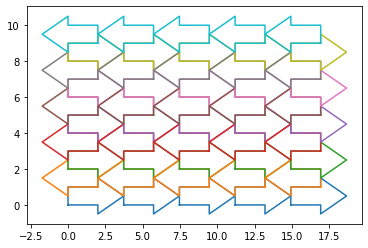

In [27]:
arrow_1 = np.array([
    [0,0,2,2,2+3**0.5,2,2,0],
    [0,1,1,1.5,0.5,-0.5,0,0],
    [1]*8
])
# reflect over midpoint and translate up
arrow_2 = reflect_matrix(translate_matrix(arrow_1,0,1),1,0,-1)
# plt.plot(arrow_1[0], arrow_1[1])
# plt.plot(arrow_2[0], arrow_2[1])

max(max(arrow_1[0]), max(arrow_2[0])) - min(min(arrow_2[0]),min(arrow_1[0]))
# tesselate_birds([arrow_1,arrow_2],5,5,max(max(arrow_1[0]), max(arrow_2[0])) - min(min(arrow_2[0]),min(arrow_1[0])),2)
tesselate_general([arrow_1,arrow_2],5,5,2+3**0.5,2)
plt.show()

# plt.plot(arrow_1[0], arrow_1[1])